In [1]:
import os
import numpy as np

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

matplotlib.rc('font', family='Malgun Gothic')  # Windows
plt.rcParams['axes.unicode_minus'] = False

SVM 처럼 **결정 트리**는 분류와 회귀 작업 그리고 다중 출력 작업도 가능한 다재다능한 머신러닝 알고리즘 이다. 또한 매우 복잡한 데이터셋도 학습할 수 있는 강력한 알고리즘이다. 

# 6.1 결정 트리 학습과 시각화

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

export_graphviz() 함수를 사용해 그래프의 정의를 iris_tree.dot 파일로 출력하여 훈련된 결정 트리를 시각화할 수 있다.

In [3]:
from sklearn.tree import export_graphviz

export_graphviz(tree_clf, 
                out_file='./images/iris_tree.dot', 
                feature_names=["꽃잎 길이 (cm)", "꽃잎 너비 (cm)"], 
                class_names=iris.target_names, 
                rounded=True, 
                filled=True)

In [4]:
#1. pip install graphviz
#2. graphviz msi 설치
#3. graphviz PATH 정해주기

import os 
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

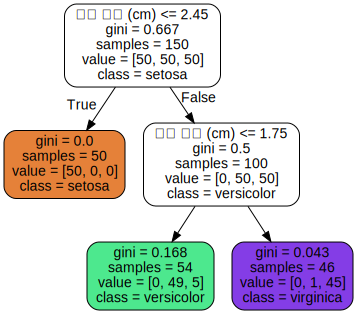

In [5]:
import graphviz
with open("images/iris_tree.dot",'r',encoding='UTF8') as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='iris_tree', directory='./images', cleanup=True)
dot

**루트 노드**(깊이가 0인 맨 꼭대기의 노드)에서 꽃잎의 길이가 2.45cm 보다 짧은지 검사한다.   
만약 그렇다면 루트 노드에서 왼쪽의 **자식 노드**로 이동한다.  
자식을 가지지 않는 **리프 노드**는 추가적인 검사를 하지 않는다. 

value=[Iris-setosa, Iris-Versicolor, Iris-Virginia]  
gini= 불순도를 의미하며 한 노드의 모든 샘플이 같은 클래스에 속해 있다면 이 노드를 순수(gini=0)이라고 한다. ex) 1-(0/54)^2-(49/54)^2-(5/54)^2 $\approx$ 0.168

$$ G_i= 1- \sum p_{i,k}^2$$

사이킷런에서도 **이진 트리**만 만드는 CART 알고리즘을 사용한다. 그러므로 리프 노드 외의 모든 노드는 자식 노드를 두 개씩 갖는다. 하지만 ID3 같은 알고리즘은 둘 이상의 자식 노드를 가진 결정 트리를 만들 수 있다

# 6.2 예측하기

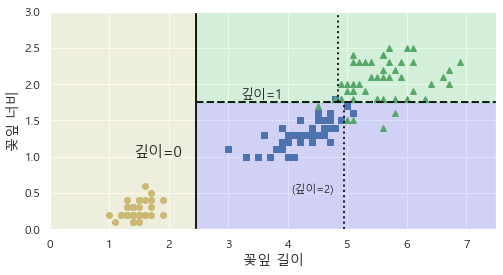

In [6]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("꽃잎 길이", fontsize=14)
        plt.ylabel("꽃잎 너비", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "깊이=0", fontsize=15)
plt.text(3.2, 1.80, "깊이=1", fontsize=13)
plt.text(4.05, 0.5, "(깊이=2)", fontsize=11)

plt.show()

굵은 수직선이 루트 노드(깊이 0)의 결정 경계를 나타낸다. 왼쪽 영역은 순수 노드(Iris-Setosa만 있음)이기 때문에 더 이상 나눌 수 없다. 하지만 오른쪽 영역은 순수 노드가 아니므로 깊이 1의 오른쪽 노드는 꽃잎 너비=1.75에서 나누어 떨어진다.

**화이트 박스 vs 블랙박스**

매우 직관적이고 결정 방식을 이해하기 쉬운 모델을 **화이트 박스(white box)** 모델이라고 한다 반대로 앞으로 보게 될 랜덤 포레스트나 신경망은 **블랙 박스(black box)** 이다. 이 알고리즘들은 성능이 뛰어나고 예측을 만드는 연산과정을 쉽게 확인할 수 있다. 그렇지만 왜 그런 예측을 만드는지는 쉽게 설명하기 어렵다.

# 6.3 클래스 확률 추정

결정 트리는 한 샘플이 특정 클래스 k에 속할 확률을 추정할 수도 있다. 먼저 이 샘플에 대한 리프 노드를 찾기 위해 트리를 검색하고 그 노드에 있는 클래스 k의 훈련 샘플의 비율을 반환한다. 클래스 하나를 예측한다면 가장 높은 확률을 가진 Iris-Versicolor를 출력한다

In [7]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [8]:
tree_clf.predict([[5, 1.5]])

array([1])

# 6.4 CART 훈련 알고리즘

사이킷런은 결정 트리를 훈련시키기 위해 **CART**(classification And Regression Tree) 알고리즘을 사용한다. 먼저 훈련세트를 하나의 특성 k의 임곗값 t_k를 사용해 두 개의 서브셋으로 나눈다. 크기에 따른 가중치가 적용된 가장 순수한 서브셋으로 나눌 수 있는 (k,t_k)짝을 찾는다. 이 알고리즘이 최소화 해야 하는 비용함수는 다음과 같다.

$$ J(k,t_k)= \frac{m_{left},m}G_{left} +\frac{m_{right},m}G_{right} $$

여기서 $\ G_{left/right}$는 왼쪽/오른쪽 서브셋의 불순도 , $\ m_{left/right}$는 왼쪽/오른쪽 서브셋의 샘플 수

훈련세트를 성공적으로 둘로 나누었다면 같은 방식으로 서브셋을 또 나누고 그 다음엔 서브셋의 서브셋으로 나누고 이런 식으로 계속 반복한다. 이 과정은 최대 깊이가 되면 중지하거나 불순도를 줄이는 분할을 찾을 수 없을 때 멈추게 된다.  
 
여기에서 볼 수 있듯이 CART 알고리즘은 greedy algorithm이다. 맨 위 루트 노드에서 최적의 분할을 찾으며 각 단계에서 이 과정을 반족한다. 현재 단계의 분할이 몇 단계를 거쳐 가장 낮은 불순도로 이어질 수 있을지 없을지는 고려하지 않는다. 최적의 솔루션을 보장하지는 않는다.  

불행하게도 최적의 트리를 찾는 것은 **NP-완전** 문제로 알려져 있다. 이 문제는 $\ O(exp(m)) 시간이 필요하고 매우 작은 훈련 세트에도 적용하기 어렵다. 그러므로 '납득할 만한 좋은 솔루션'으로만 만족해야 한다.

# 6.5 계산 복잡도

예측을 하려면 결정트리를 루트노드에서부터 리프노드까지 탐색해야 한다. 일반적으로 결정 트리는 거의 균형을 이루고 있으므로 결정트리를 탐색하기 위해서는 약 $\ O(log_2(m))$개의 노드를 거쳐야 한다. 각 노드는 하나의 특성값만 확인하기 때문에 에측에 필요한 전체 복잡도는 특성 수와 무관하게 $\ O(log_2(m))$이다. 그래서 큰 훈련세트를 다룰때도 예측 속도가 매우 빠르다.  

훈련세트가 수천개 이하로 작을 경우 사이킷런은 presort=True로 미리 데이터를 정렬하여 훈련 속도를 높일 수 있다. 하지만 훈련세트가 많이 큰 경우는 속도가 느려진다.

# 6.6 지니 불순도 또는 엔트로피?

지니 불순도가 사용되지만 criterion 매개변수를 "entropy"로 지정하여 엔트로피 불순도를 사용할 수 있다. 분자가 안정되고 질서정연하면 엔트로피가 0에 가깝다. 메세지의 평균 정보양을 측정하는 섀넌 **정보 이론** 도 여기에 포함된다. 모든 메세지가 동일할때 엔트로피가 0이 된다. (모든 메세지가 동일하면 얻을 수 있는 정보의 양이 적기 때문에 엔트로피가 작아진다. 정보의 양과 엔트로피는 비례)

$$ H_i = - \sum\limits_{k=1}^n\ {p_{i,k}}\log_2(p_{i,k}) $$

지니 불순도와 엔트로피는 큰 차이가 없으며 비슷한 트리를 만들어낸다. 지니 불순도가 계산이 좀 더 빠르기 때문에 기본값으로 좋다. 그러나 다른 트리가 만들어지는 경우 지니 불순도가 가장 빈도 높은 클래스 한쪽 가지로 고립시키는 경향이 있는 반면 엔트로피는 조금 더 균형 잡힌 트리를 만든다.

# 6.7 규제 매개변수

결정 트리는 훈련 데이터에 대한 제약사항이 거의 없다. 제한을 두지 않으면 트리가 훈련 데이터에 아주 가깝게 맞추려고 해서 대부분 과대적합되기 쉽다. 결정 트리는 모델 파라미터가 전혀 없는 것이 아니라 훈련되기 전에 파라미터 수가 결정되지 않기 때문에 이런 모델을 **비파라미터 모델**이라고 부르곤 한다. 반대로 선형모델 같은 **파라미터 모델**은 미리 정의된 모델 파라미터 수를 가지므로 자유도가 제한되고 과대적합 될 위험이 준다.  

훈련데이터에 대한 과대적합을 피하기 위해 학습할 때 결정 트리의 자유도를 제한할 필요가 있다 이를 **규제**라고 한다. 보통 적어도 결정 트리의 최대 깊이는 제어할 수 있다. 사이킷런에서 max_depth 매개변수로 이를 조절한다.  

DecisionTreeClassdifier에는 비슷하게 결정 트리의 형태를 제한하는 다른 매개 변수가 몇 개 있다.

- min_samples_split : 분할되기 위해 노드가 가져야 하는 최소 샘플(데이터) 수  
- min_samples_leaf : 리프 노드가 가지고 있어야 하는 최소 샘플 수  
- min_weight_fraction_leaf : min_samples_leaf와 같지만 가중치가 부여된 전체 샘플 수에서의 비율  
- max_leaf_nodes : 리프 노드의 최대 개수  
- max_features : 각 노드에서 분할에 사용할 특성의 최대 수  

min으로 시작하는 매개변수를 증가시키거나 max로 시작하는 매개변수를 감소시키면 모델에 규제가 커진다.  





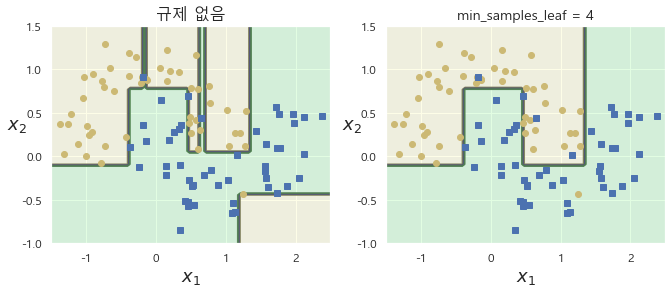

In [9]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("규제 없음", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

plt.show()

왼쪽 결정 트리는 기본 매개변수를 사용하여 훈련시켰고, 오른쪽 결정 트리는 min_samples_leaf=4로 지정하여 훈련시켰다. 왼쪽 모델은 확실히 과대적합 되었고 오른쪽 모댈은 일반화 성능이 더 좋을 것 같아 보인다.

제한 없이 결정 트리를 훈련시키고 불필요한 노드를 **가지치기**하는 알고리즘도 있다. 순도를 높이는 것이 **통계적으로 큰 효과가 없다면** 리프 노드 바로 위의 노드는 불필요 할 수도 있다. 대표적으로 $\chi^2$ 검정 같은 통계적 검정을 사용하여 우연히 향상된 것인지 추정한다. 귀무가설을 기각하지 못하면 그 노드는 불필요한 것으로 간주되고 그 자식 노드는 삭제 된다. 불필요한 노드가 모두 없어질 때까지 계속된다.

# 6.8 회귀

결정 트리는 회귀 문제에도 사용할 수 있다. 사이킷런의 DecisionTreeRegressor를 사용해 노이즈가 섞인 2차 함수 형태의 데이터셋에서 max_depth=2 설정으로 회귀 트리를 만들어 보자

$$ y = 4(x-0.5)^2 + noise $$

In [10]:
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [11]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

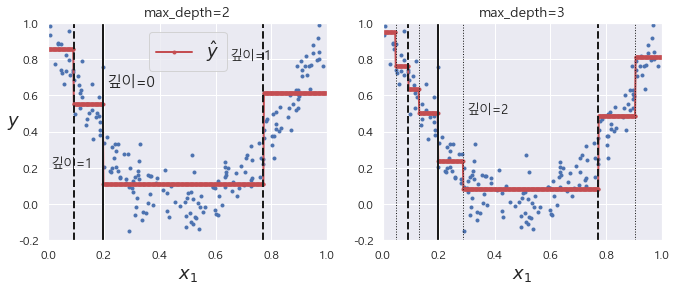

In [12]:
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "깊이=0", fontsize=15)
plt.text(0.01, 0.2, "깊이=1", fontsize=13)
plt.text(0.65, 0.8, "깊이=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "깊이=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

In [13]:
export_graphviz(
        tree_reg1,
        out_file="./images/regression_tree.dot",
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

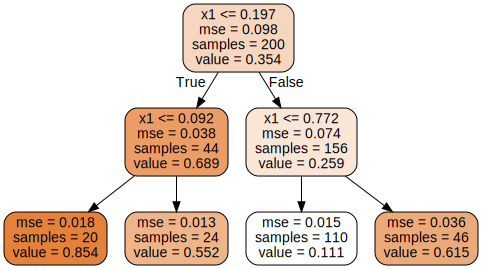

In [14]:
import graphviz
with open("./images/regression_tree.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='regression_tree', directory='./images/decision_trees', cleanup=True)
dot

앞서 만든 분류 트리와 매우 비슷해 보인다. 주요 차이는 각 노드에서 클래스를 예측하는데 대신 어떤 값을 예측한다는 점이다.   

예를들어 $x_1=0.6$인 데이터의 값을 예측한다고 했을 때, 위의 그래프를 따라 가다보면, $\text{value} = 0.111$이 되며, 해당 노드의 110개의 샘플의 평균값이 예측값이 된다. 그리고 이 110개의 샘플에 대한 MSE값이 0.015이다.

CART 알고리즘은 학습 데이터셋을 평균제곱오차(MSE)를 최소화하도록 트리를 분할한다.



$$ J(k,t_k)= \frac{m_{left},m}G_{left} +\frac{m_{right},m}G_{right} $$

![mse](./images/mse.png)



분류에서와 같이 회귀 작업에서도 결정 트리가 과적합되기 쉽다. 규제가 없다면 왼쪽과 같은 예측을 하게 된다. min_samples_leaf=10으로 지정하면 오른쪽처럼 그럴싸한 모델을 만들어 준다.

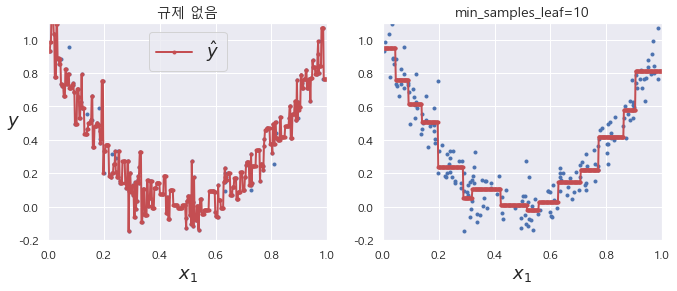

In [15]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("규제 없음", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()

# 6.9 불안정성

결정 트리는 이해하기 쉬우며 사용하기 편하고, 여러용도로 사용할 수 있으며, 성능도 뛰어나다. 하지만 몇가지 제한사항이 있다. 결정 트리는 계단 모양의 결정 경계를 만들어 훈련세트의 회전에 예민하다. 두 결정 트리 모두 훈련세트를 완벽하게 학습하지만 오른쪽 모델은 불필요하게 구불구불해졌다. 두 결정 트리 모두 훈련세트를 완벽하게 학습하지만 오른쪽 모델은 잘 일반화될 것 같지 않다. 이런 문제를 해결하는 한 가지 방법은 훈련데이터를 더 좋은 방향으로 회전시키는 PCA 기법를 사용하는 것이다.

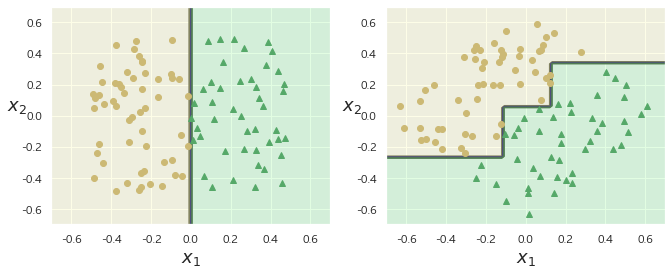

In [16]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

plt.show()

결정트리의 주된 문제는 훈련 데이터에 있는 작은 변화에도 매우 민감하다는 것이다. 예를 들어 훈련세트에서 가장 넓은 Iris-Versicolor를 제거하고 결정 트리를 훈련시키면 다음과 같은 모델을 얻게 된다. 사실 사이킷런에서 사용하는 훈련 알고리즘은 확률적이기 때문에 random_state 매개변수를 지정하지 않으면 같은 훈련 데이터에서도 다른 모델을 얻게 될 수 있다. 

In [17]:
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # 가장 너비가 큰 Iris-Versicolor

array([[4.8, 1.8]])

In [18]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=40, splitter='best')

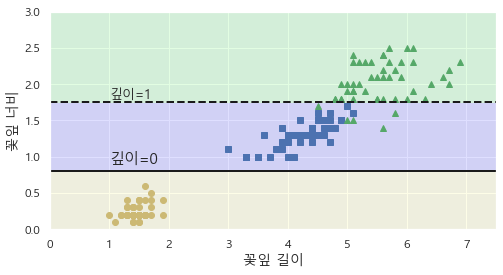

In [19]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "깊이=0", fontsize=15)
plt.text(1.0, 1.80, "깊이=1", fontsize=13)

plt.show()